# Otimização Multiobjetivo com Estimação de Distribuição guiada por Tomada de Decisão Multicritério

*As intruções para a reprodução deste paper executável estão disponíveis em https://github.com/pedro-mariano/IA369*

## Introdução 

Problemas envolvendo a otimização simultânea de múltiplos objetivos ganham cada vez mais evidência com o avanço tecnológico. Há um aumento de interesse por formulações matemáticas voltadas para problemas de otimização multiobjetivo e de tomada de decisão multicritério, os quais possuem frentes de pesquisa bem consolidadas e com as seguintes estratégias: 

1. Otimização  multiobjetivo  (do  inglês *Multi-Objective Optimization* – MOO) (Branke et al., 2008): busca amostrar a fronteira de Pareto, composta por soluções eficientes do problema e que apresentam diferentes compromissos entre os objetivos, permitindo que a preferência do tomador de decisão seja definida e aplicada a posteriori. 

2. Tomada de decisão multicritério (do inglês *Multicriteria Decision Making* – MCDM) (Köksalan et al., 2011; Steuer, 1986): busca explorar a preferência a priori do tomador de decisão, de modo a ordenar por mérito as múltiplas alternativas de soluções eficientes existentes. 

Dentre as técnicas já propostas para resolver problemas MOO, destacam-se as metaheurísticas de otimização, em especial as que recorrem a estratégias de busca populacional (Coello Coello et al., 2007). Essas metaheurísticas centram seus esforços na descoberta de novas soluções candidatas que sejam diversas entre si e não-dominadas pelas demais soluções candidatas já descobertas, num processo iterativo. Nesta busca iterativa por se aproximar cada vez mais de soluções pertencentes à fronteira de Pareto, e dadas limitações de memória e processamento que inviabilizam a manutenção de todas as soluções candidatas já descobertas, muitas propostas já foram feitas na literatura para se definir que soluções candidatas já descobertas devem ser descartadas e quais devem ser usadas como ponto de partida para a descoberta de novas soluções. Como as metaheurísticas para MOO recorrem a muitos processos de tomada de decisão durante a busca populacional, a ideia aqui proposta consiste em utilizar técnicas de MCDM para ordenar por mérito as soluções não-dominadas correspondentes no espaço dos objetivos, com o intuito de obter novas soluções a partir daquelas que se mostram mais promissoras. Soluções não-dominadas entre si geralmente são tomadas na literatura como tendo a mesma relevância na definição da próxima população de soluções candidatas (Deb et al., 2002). Espera-se, com isso, chegar a técnicas de solução para MOO capazes de explorar ainda mais eficazmente os recursos computacionais dispo- níveis, além de potencialmente conduzir a soluções de melhor qualidade.

Visto que é razoável supor que as soluções candidatas melhor classificadas estão localizadas nas regiões mais promissoras do espaço de busca, a lista ordenada de soluções candidatas pode ser explorada para conceber um modelo de estimação de distribuição (Hauschild & Pelikan, 2011). Neste trabalho, recorremos a um modelo de mistura de gaussianas, onde o centro de cada gaussiana está posicionado em uma solução candidata e os coeficientes de ponderação das gaussianas são não-negativos, com soma igual a um. O coeficiente de cada gaussiana é proporcional à qualidade relativa da correspondente solução candidata, de modo que soluções de alta qualidade irão contribuir mais para a função densidade de probabilidade. O desvio padrão de cada gaussiana depende de uma distância calculada par-a-par, a ser detalhada posteriormente.

## Proposta 

A estratégia da técnica inspira-se em algoritmos estado-da-arte em MOO, NSGA-II (Deb et al., 2002) e NSGA-III (Deb & Jain, 2013) - do inglês *Non-dominated Sorting Genetic Algorithm*. Estas metaheurísticas populacionais realizam, a cada geração, uma ordenação por não-dominância dos indivíduos.  Os indivíduos são separados em classes de dominância, e aqueles pertencentes às classes superiores são selecionados para integrar a população da próxima geração. Para comparar soluções candidatas pertencentes à mesma classe, utiliza-se uma medida que indica qual solução deve ser escolhida para melhorar a diversidade das soluções. No entanto, apenas um cirtério por vez é utilizado para classificar soluções candidatas.  Neste trabalho, propomos adotar uma conhecida técnica de tomada de decisão multicritério, o algoritmo TOPSIS (do inglês *Technique for Order of Preference by Similarity to Ideal Solution*) (Hwang & Yoon, 1981), para classificar soluções candidatas dentro de uma mesma classe de dominância segundo múltiplos critérios estabelecidos por um tomador de decisão, como proximidade a valores de referência e a própria promoção de diversidade da população. As preferências do usuário são inspiradas em políticas de decisão já propostas por algoritmos estado-da-arte. A amostragem de novas soluções candidatas é implementada por uma mistura de gaussianas, de modo que regiões do espaço de busca que contenham soluções de alta qualidade sejam exploradas de maneira mais intensa.

## Metodologia

As seções a seguir descrevem os métodos que serão utilizados como base para o algoritmo proposto.

### NSGA-II

O NSGA-II foi proposto em Deb et al., 2002 e emprega o conceito de classes de dominância. A cada geração $t$, os indivíduos da população $P_t$ e seus descendentes $Q_t$ são ordenados de acordo com sua dominância por um processo denominado *Fast Non-dominated Sorting*. Ao final do processo, obtém-se a lista $\mathcal{F}=(\mathcal{F}_1,\mathcal{F}_2,...)$ de classes de dominância. A primeira classe $\mathcal{F}_1$ contém os indivíduos não-dominados, e corresponde à solução proposta pelo algoritmo. Para as classes subsequentes, os indivíduos pertencentes a uma classe $\mathcal{F}_i, i>1$, são dominados apenas por indivíduos presentes nas classes $\mathcal{F}_j, \forall j < i$. Após realizada a ordenação, a população da geração seguinte $P_{t+1}$, de tamanho fixo $N$, é preenchida com indivíduos das primeiras classes, até que não seja mais possível inserir todos os indivíduos de uma dada classe sem exceder $N$. Seja $\mathcal{F}_k$ a classe para a qual não foi possível inserir todos os indivíduos em $P_{t+1}$. Os indivíduos desta classe candidatos a comporem $P_{t+1}$ são ordenados de acordo com a medida de *crowding distance*, que avalia a densidade da população no espaço dos objetivos. As vagas restantes de $P_{t+1}$ são atribuídas àqueles que se situam nas regiões menos densas, com o intuito de manter a diversidade da população no espaço dos objetivos. Uma vez composta a população da nova geração, se inicia o processo de obtenção de novas soluções. Os progenitores são selecionados por meio de torneio binário, onde o vencedor é determinado pelos mesmos critérios utilizados para selecionar indivíduos para a população. Os descendentes são gerados a partir de operadores de recombinação e mutação, e inicia-se uma nova geração do algoritmo, até atingir seu critério de parada.

Como podemos notar, na proposta original do NSGA-II, apenas um critério por vez é levado em conta para selecionar membros: dominância, e em caso de empate, diversidade no espaço dos objetivos. Neste trabalho, propõe-se a utilização de múltiplos critérios ao invés de apenas um; o algoritmo TOPSIS é então empregado para ordenar as soluções dentro de uma dada classe de dominância.

Uma versão simplificada do algoritmo NSGA-II é apresentada a seguir. Para mais detalhes sobre as operações realizadas em cada passo, consultar Deb et al., 2002.

**Algoritmo 1: NSGA-II - *Loop* principal** <br>
*Enquanto o critério de parada não for atendido:*<br>
$R_t = P_t \cup Q_t$<br>
$\mathcal{F} = \textit{fast-non-dominated-sort}(R_t)$<br>
$P_{t+1} = \emptyset, i=1 $<br>
*Enquanto* $ |P_{t+1}| + |\mathcal{F}_i| \leq N$:<br>
$\quad \textit{avalia-critérios} (\mathcal{F}_i)$<br>
$\quad P_{t+1} = P_{t+1} \cup \mathcal{F}_i$<br>
$\quad i = i+1$<br>
$\textit{ordena-critérios}(\mathcal{F}_i)$<br>
$P_{t+1} = P_{t+1} \cup \mathcal{F}_i[1:N-|P_{t+1}|]$<br>
$Q_{t+1} = \textit{gera-descendentes}(P_{t+1}) $<br>
$t = t+1$<br>
*Retorna ao primeiro passo*

### NSGA-III

O NSGA-III foi proposto em Deb & Jain, 2013. Essencialmente, o algoritmo tem a mesma estrutura que a sua versão anterior, e também realiza a ordenação por dominância para classificar soluções candidatas. O critério de desempate para soluções dentro de uma mesma classe de dominância, entretanto, é diferente. Esta versão do algoritmo busca aliviar problemas que surgem em MOO quando há muitas funções objetivos (mais do que três). Para tal, o método avalia as soluções com base em pontos de referência, que são valores desejados para as funções objetivo, utilizados para guiar a busca de novas soluções candidatas. Estes pontos de referência podem ser fornecidos pelo usuário ou obtidos por meio de uma abordagem estrutural. Cada ponto dá origem a uma direção de referência, tomando como origem o ponto ideal no espaço de objetivos. Após normalizar as soluções, cada uma é associada à direção de referência mais próxima. A vizinhança de uma dada direção de referência é definida pelas soluções candidatas associadas a ela. Assim, o critério secundário promove a diversidade da população priorizando as soluções que se situam nas direções menos povoadas.

### TOPSIS

Nesta pesquisa, o foco está em ordenar múltiplas soluções candidatas não dominadas entre si. Dentre as técnicas alternativas existentes na literatura, destaca-se o algoritmo TOPSIS (Hwang & Yoon, 1981), o qual é ainda um dos algoritmos mais utilizados, pela sua simplicidade e pelo emprego de regras intuitivas \cite{Behzadian2012}. A ideia por trás do TOPSIS é que a melhor opção de solução é aquela mais próxima da melhor solução possível e tão distante quanto possível da pior solução possível.

Considere o problema de selecionar uma entre $Q$ soluções candidatas. Cada solução
alternativa é avaliada junto a $M$ critérios. Seja $S=\{S_1, S_2,..., S_Q\}$ o conjunto de $Q$ soluções candidatas e $C=\{C_1, C_2,..., C_M\}$ o conjunto de $M$ critérios. Chega-se então à seguinte matriz de decisão:

<img src="../figures/decision_matrix.png" width="250px">

onde $v_{ij}$ representa a avaliação da $i$-ésima solução candidata em relação ao $j$-ésimo critério. Os passos do algoritmo TOPSIS são apresentados a seguir:

**Algoritmo 2: TOPSIS**<br>
1. Normalize a matriz de decisão:

$$
r_{ij} = \frac{v_{ij}}{\sqrt[]{\sum\limits_{k=1}^{Q} v_{kj}^2}}
$$

2. Incorpore os pesos de cada critério junto à matriz de decisão, produzindo:

$$
d_{ij} = w_{j}r_{ij}
$$

3. Defina a solução ideal positiva $d_j^+$ e a solução ideal negativa $d_j^-$ para cada um dos $M$ critérios: $d_j^+ = min(d_{1j} ,... , d_{Qj}) $ e $d_j^- = max(d_{1j} ,... , d_{Qj}) $  quando o critério está sendo minimizado, e vice-versa quando o critério está sendo maximizado.

4. Calcule a medida de separação para cada solução candidata:

$$
S_i^+ = \sqrt[]{\sum\limits_{j=1}^{M} (d_j^+ - d_{ij})^2}, i=1,...,Q
$$

$$
S_i^- = \sqrt[]{\sum\limits_{j=1}^{M} (d_j^- - d_{ij})^2}, i=1,...,Q
$$

5. Calcule os coeficientes de proximidade da solução ideal de cada solução candidata:

$$
CC_i = \frac{S_i^-}{S_i^- + S_i^+}, i=1,...,Q
$$

6. Ordene as soluções candidatas de acordo com esses coeficientes de proximidade, de modo que, quanto maior $CC_i$, melhor será a $i$-ésima solução candidata.

### Estimação de distribuição

O problema de estimar a função densidade de probabilidade de uma distribuição contínua de dados requer a identificação de um modelo para essa função. A ideia aqui é adotar a ordenação das soluções candidatas produzidas pelo algoritmo de MCDM denominado TOPSIS para gerar um modelo de distribuição paramétrico, mais especificamente uma mistura de gaussianas (Bilmes, 1997), que será utilizado para a amostragem de novas soluções candidatas. Um modelo de misturas é formado por uma composição de diversas funções densidade de probabilidade, distintas ou não. Em uma mistura de gaussianas, essas funções são gaussianas. Para a $k$-ésima função, um coeficiente de ponderação $\pi_k$ é atribuído para indicar a chance de que um novo dado seja gerado por essa função. Esses coeficientes são chamados de coeficientes de mistura e satisfazem a relação a seguir:

$$ \sum\limits_{k=1}^N \pi_k = 1, \quad 0 \leq \pi_k \leq 1 $$

onde $N$ é o número de funções. No nosso caso, cada solução candidata é o centro de uma gaussiana no espaço das variáveis de decisão. O coeficiente de mistura de uma dada função é tão alto quanto a relevância da solução candidata correspondente, fornecida pelo algoritmo TOPSIS. O princípio por trás dessa proposição é o de que novas soluções candidatas têm maior chance de serem geradas nas regiões próximas às soluções já encontradas que estão bem classificadas. Aqui, adotamos uma lei de decaimento linear para os coeficientes, que se anula para a pior solução:

$$ \pi_k = \frac{2(k-N)}{N(1-N)} $$

onde $k=1,...,N$ é a posição da solução candidata na lista ordenada obtida pelo TOPSIS.

## O algoritmo proposto: MOMCEDA

O algoritmo aqui proposto é denominado MOMCEDA (*Multi-Objective Multi-Criteria Estimation of Distribution Algorithm*). Sua estrutura principal segue a mesma do algoritmo genético proposto no NSGA-II e NSGA-III. As principais diferenças consistem na classificação de indivíduos e na geração de descendentes. Aqui, os indivíduos são classificados pelo algoritmo TOPSIS, de acordo com múltiplos criteŕios definidos pelo tomador de decisão. Os critérios que adotamos foram:
- Classe de dominância, obtida pela ordenação por dominância como feita no NSGA-II/NSGA-III;
- Tamanho da vizinhança da direção de referência associada a um indivíduo, como no NSGA-III;
- Distância entre o indivíduo e a direção de referência associada a ele, como no NSGA-III;
- Contribuição exclusiva do indivíduo para a métrica de hipervolume.

A métrica de hipervolume é comumente utilizada para comparar o desempenho de diferentes algoritmos de otimização multiobjetivo (Zitzler & Thiele, 1998). Esta métrica mede o "tamanho" do espaço dominado pela população final do algoritmo com relação a um ponto de referência; em duas dimensões, como é o caso dos problemas-teste aqui utilizados, esta métrica corresponde a uma área. Assim, quanto maior o valor do hipervolume, melhor a solução obtida pelo algoritmo. A contribuição exclusiva que um indivíduo traz para este indicador representa a porção do espaço que é dominada apenas por ele.

Uma vez que os indivíduos foram classificados, um modelo de distribuição de mistura de gaussianas é construído, como explicado na seção anterior. Novos descendentes são amostrados a partir desse modelo.

## Workflow

O workflow do método aqui proposto está representado na figura a seguir. O usuário fornece as funções objetivo que deseja otimizar, bem como as suas preferências que serão utilizadas para classificar soluções candidatas. Além disso, no caso de problemas-teste, a Fronteira de Pareto, que contém as soluções não dominadas do problema, é conhecida e uma amostra de seus pontos também é fornecida para o cálculo de métricas de avaliação do algoritmo. O algoritmo itera sobre uma população de soluções candidatas, cujos indivíduos não-dominados correspondem à saída ao final da execução. Esses indivíduos são utilizados para o cálculo de métricas de avaliação.

<img src="../figures/MOMCEDA-workflow.png">

## Visualização dos problemas-teste

Esta seção apresenta o conjunto de problemas-teste que serão utilizados para testar o método de otimização multiobjetivo.

### Problemas ZDT

A classe de problemas-teste ZDT (Zitzler et al., 2000) apresenta 5 problemas (de ZDT1 a ZDT4 e ZDT6) com duas funções objetivo a serem otimizadas. As fronteiras de Pareto dos problemas desta classe apresentam diferentes características: convexas, não-convexas, desconexas e não-uniformemente distribuídas. Os problemas possuem a seguinte formulação: 

$$
\min
\begin{cases}
f_1(\mathbf{x})\\
f_2(\mathbf{x}) = g(\mathbf{x}) \cdot h(f_1(\mathbf{x}),g(\mathbf{x}))
\end{cases}
$$

onde $\mathbf{x}$ é o vetor de variáveis de decisão de uma solução candidata, $f_1(\mathbf{x}), f_2(\mathbf{x})$ são as funções objetivo do problema a serem otimizadas, e $g(\mathbf{x}), h(\mathbf{x})$ são funções auxiliares. O número de variáveis de decisão e as funções variam entre os 5 problemas da classe. A fronteira de Pareto é representada por uma curva no espaço dos objetivos cujos pontos correspondem aos valores de $f_1(\mathbf{x})$ e $f_2(\mathbf{x})$ que constituem as soluções não dominadas do problema de otimização multiobjetivo. No caso dos problemas ZDT, esta curva é dada pelos valores de $\mathbf{x}$ tais que $g(\mathbf{x}) = 1$.

O trecho de código a seguir apresenta uma função que salva em um arquivo na pasta *Pareto* um conjunto de $N$ amostras da froteira de Pareto do problema *function*.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

%matplotlib inline

def generateZDTPareto(function,N):

    optimal_front = np.zeros((N,2));

    f1 = np.linspace(0,1.0,N)

    if(function == 'ZDT1' or function == 'ZDT4'):

        f2 = 1 - np.sqrt(f1)

    elif(function == 'ZDT2' or function == 'ZDT6'):

        if(function == 'ZDT6'):

            f1 = np.linspace(0.2807753191,1.0,N)

        f2 = 1 - f1**2

    elif(function == 'ZDT3'):
        f1[:N/5] = np.linspace(0,0.0830015349,N/5)
        f1[N/5:2*N/5] = np.linspace(0.1822287280,0.2577623634,N/5)
        f1[2*N/5:3*N/5] = np.linspace(0.4093136748,0.4538821041,N/5)
        f1[3*N/5:4*N/5] = np.linspace(0.6183967944,0.6525117038,N/5)
        f1[4*N/5:] = np.linspace(0.8233317983,0.8518328654,N/5)

        f2 = 1 - np.sqrt(f1) -f1*np.sin(10*np.pi*f1)


    optimal_front[:,0] = f1
    optimal_front[:,1] = f2

    optimal_front = optimal_front.tolist()
    
    with open(''.join(['../data/Prt_',function,'.json']),'w') as outfile:
        json.dump(optimal_front,outfile)

A função a seguir gera uma figura com a representação gráfica da fronteira de Pareto do problema *function*, fazendo uso do conjunto de amostras que foi gerado e salvo em um arquivo previamente.

In [2]:
def plot_2dfunction(function):
    #with open(''.join(['Pareto/Prt_',function,'.pk1']), 'r') as filename:
        #f = pickle.load(filename)
     
    with open(''.join(['../data/Prt_',function,'.json'])) as optimal_front_data:
        f = np.array(json.load(optimal_front_data))
    if(function == 'ZDT3'):
        N = f.shape[0]
        plt.plot(f[:N/5,0],f[:N/5,1],color='b')
        plt.plot(f[N/5:2*N/5,0],f[N/5:2*N/5,1],color='b')
        plt.plot(f[2*N/5:3*N/5,0],f[2*N/5:3*N/5,1],color='b')
        plt.plot(f[3*N/5:4*N/5,0],f[3*N/5:4*N/5,1],color='b')
        plt.plot(f[4*N/5:,0],f[4*N/5:,1],color='b')
    else:
        plt.plot(f[:,0],f[:,1],color='b')
    plt.xlabel('f1')
    plt.ylabel('f2')
    plt.show()

#### ZDT1

O problema ZDT1 possui $n=30$ variáveis definidas no domínio $\mathbf{x}_i \in [0;1], i=1,...,n$ e apresenta fronteira de Pareto contínua, convexa e uniformemente distribuída. Suas funções estão definidas a seguir:

$$ 
\begin{cases}
f_1(\mathbf{x}) = \mathbf{x}_1\\
g(\mathbf{x}) = 1 + \frac{9}{n-1} \sum \limits_{i=2}^{n} \mathbf{x}_i\\
h(f_1(\mathbf{x}),g(\mathbf{x})) = 1 - \sqrt[]{\frac{f_1(\mathbf{x})}{g(\mathbf{x})}}
\end{cases}
$$

A fronteira de Pareto do problema pode ser vista na figura abaixo.

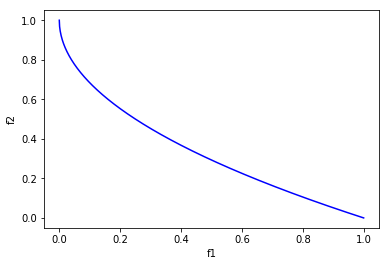

In [3]:
function = 'ZDT1'
N = 1000
generateZDTPareto(function,N)
plot_2dfunction(function)

#### ZDT2

O problema ZDT2 possui $n=30$ variáveis definidas no domínio $\mathbf{x}_i \in [0;1], i=1,...,n$ e apresenta fronteira de Pareto contínua, não-convexa e uniformemente distribuída. Suas funções estão definidas a seguir:

$$ 
\begin{cases}
f_1(\mathbf{x}) = \mathbf{x}_1\\
g(\mathbf{x}) = 1 + \frac{9}{n-1} \sum \limits_{i=2}^{n} \mathbf{x}_i\\
h(f_1(\mathbf{x}),g(\mathbf{x})) = 1 - \left(\frac{f_1(\mathbf{x})}{g(\mathbf{x})}\right)^2
\end{cases}
$$

A fronteira de Pareto do problema pode ser vista na figura abaixo.

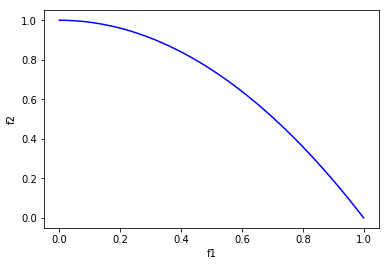

In [4]:
function = 'ZDT2'
N = 1000
generateZDTPareto(function,N)
plot_2dfunction(function)

#### ZDT3

O problema ZDT3 possui $n=30$ variáveis definidas no domínio $\mathbf{x}_i \in [0;1], i=1,...,n$ e apresenta fronteira de Pareto não-contínua. Suas funções estão definidas a seguir:

$$ 
\begin{cases}
f_1(\mathbf{x}) = \mathbf{x}_1\\
g(\mathbf{x}) = 1 + \frac{9}{n-1} \sum \limits_{i=2}^{n} \mathbf{x}_i\\
h(f_1(\mathbf{x}),g(\mathbf{x})) = 1 - \sqrt[]{\frac{f_1(\mathbf{x})}{g(\mathbf{x})}} - \left(\frac{f_1(\mathbf{x})}{g(\mathbf{x})}\right) \cdot \sin (10 \cdot \pi \cdot f_1(\mathbf{x}))
\end{cases}
$$

A fronteira de Pareto do problema pode ser vista na figura abaixo.

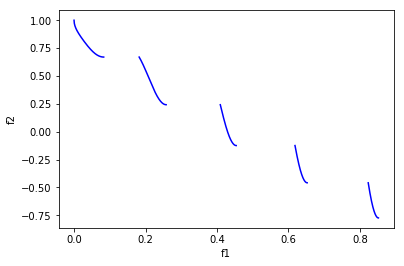

In [5]:
function = 'ZDT3'
N = 1000
generateZDTPareto(function,N)
plot_2dfunction(function)

#### ZDT4

O problema ZDT4 possui $n=10$ variáveis definidas no domínio  $\mathbf{x}_1 \in [0;1]$ e $\mathbf{x}_i \in [-5;5], i=2,...,n$ e apresenta fronteira de Pareto contínua e convexa. O problema apresenta diversas soluções Pareto-ótimas locais, que podem dificultar a aproximação da fronteira de Pareto real. Suas funções estão definidas a seguir:

$$ 
\begin{cases}
f_1(\mathbf{x}) = \mathbf{x}_1\\
g(\mathbf{x}) = 1 + 10(n-1) + \sum \limits_{i=2}^{n} [\mathbf{x}_i^2 - 10 \cdot \cos (4 \cdot \pi \cdot \mathbf{x}_i)]\\
h(f_1(\mathbf{x}),g(\mathbf{x})) = 1 - \sqrt[]{\frac{f_1(\mathbf{x})}{g(\mathbf{x})}}
\end{cases}
$$

A fronteira de Pareto do problema pode ser vista na figura abaixo.

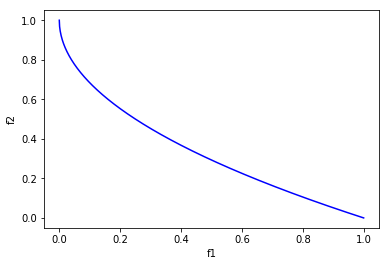

In [6]:
function = 'ZDT4'
N = 1000
generateZDTPareto(function,N)
plot_2dfunction(function)

#### ZDT6

O problema ZDT6 possui $n=10$ variáveis definidas no domínio $\mathbf{x}_i \in [0;1], i=1,...,n$ e apresenta fronteira de Pareto contínua, não-convexa e não uniformemente distribuída. Suas funções estão definidas a seguir:

$$ 
\begin{cases}
f_1(\mathbf{x}) = 1 - \exp (-4\mathbf{x}_1) \cdot \sin ^6 (6 \cdot \pi \cdot \mathbf{x}_1) \\
g(\mathbf{x}) = 1 + 9 \cdot \left(\frac{\sum \limits_{i=2}^{n} \mathbf{x}_i}{9}\right)^{0.25} \\
h(f_1(\mathbf{x}),g(\mathbf{x})) = 1 - \left(\frac{f_1(\mathbf{x})}{g(\mathbf{x})}\right)^2
\end{cases}
$$

A fronteira de Pareto do problema pode ser vista na figura abaixo.

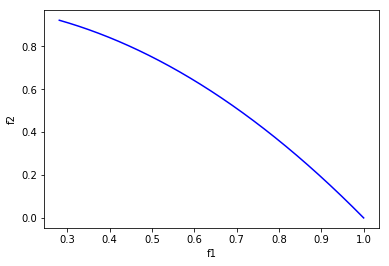

In [7]:
function = 'ZDT6'
N = 1000
generateZDTPareto(function,N)
plot_2dfunction(function)

## Experimentos computacionais

Nesta seção apresentaremos os resultados dos experimentos computacionais.

### Teste interativo

Primeiramente, um teste interativo é realizado com o problema ZDT1 para visualizar a evolução da população de soluções não-dominadas no espaço dos objetivos ao longo das gerações. Ao longo da execução do algoritmo, uma figura exibe os pontos no espaço dos objetivos que representam as soluções não-dominadas da população, com cores diferentes para cada geração. As cores mais escuras correspondem às gerações mais recentes. Ao final da execução, a Fronteira de Pareto do problema também é exibida. 

Duas métricas são computadas para avaliar o desempenho do algoritmo: hipervolume e convergência. Aqui, adotamos o ponto de referência com as coordenadas $(1{,}1;1{,}1)$ para o cálculo do hipervolume. A medida de convergência mede a distância média, no espaço dos objetivos, entre as soluções obtidas pelo algoritmo e um conjunto de 1000 amostras equi-espaçadas da fronteira de Pareto. Logo, quanto menor o valor desta métrica, melhor a solução obtida.

O conjunto de parâmetros adotado é apresentado no trecho de código a seguir. Como a população inicial é gerada de forma aleatória, registramos o valor da semente utilizada, que é igual a 1. Trabalhamos com uma população de tamanho 100, e com o mesmo número de pontos de referência. O critério de parada do algoritmo é o número de avaliações das funções objetivo: 5000. O número de pontos de referência que definem as vizinhanças no espaço de objetivos é igual ao tamanho da população. O vetor $\mathbf{w}$ apresenta a importância relativa dos critérios utilizados para classificação dos indíviduos, na mesma ordem em que foram definidos na seção em que apresentamos o método. Quanto maior o valor atribuído para um dado critério, maior será a importância atribuída a ela na classificação dos indivíduos. Aqui, o critério de maior importância é a classe de dominância.

In [8]:
%run ../dev/MOMCEDA/MOMCEDA.py
%matplotlib qt

# Parameter settings

seed = 1 # Random seed
NPop = 100 # Population size
NEval = 5000 # Number of function evaluations
Nref = NPop # Number of reference points
nReps = 1 # Number of repetitions
RTPlot = True # Activate interactive plots
refPoint = [1.1,1.1] # Reference point for hypervolume indicator
w = np.array([10.0,5.0,3.0,1.0]) # Array of weights used for TOPSIS 

# Test-problem selection

function = 'ZDT1' # Type of problem

runMOMCEDA(NPop,NEval,function,Nref,nReps,RTPlot,refPoint,w,seed)

Running MOMCEDA

Starting execution 1 ...
Hypervolume =  0.852772204759
Convergence metric =  0.0127404749939
Execution  1  completed in  28.0749788284  seconds 

Average hypervolume= 0.852772204759
Best hypervolume= 0.852772204759

MOMCEDA finished all experiments



### Testes definitivos

Para avaliar o desempenho do método proposto, são realizadas 10 execuções para cada problema com 20000 avaliações da função objetivo. O algoritmo NSGA-II também é executado para comparação de resultados. Para reduzir o tempo de execução, a população não será mais exibida. Os experimentos foram realizados em uma máquina com as seguintes configurações: 

Sistema Operacional: Ubuntu 16.04 LTS <br>
Processador: Intel® Core™ i7-4720HQ CPU @ 2.60GHz × 8 <br>
Memória RAM: 16GB <br>

O tempo médio para cada execução do MOMCEDA foi cerca de 100 segundos, e o tempo total médio para cada problema-teste foi aproximadamente 17 minutos.

#### ZDT1

In [9]:
%run ../dev/MOMCEDA/nsga2.py
plt.close('all')

# Parameter settings

seed = 1 # Random seed
NPop = 100 # Population size
NEval = 20000 # Number of function evaluations
nReps = 10 # Number of repetitions
RTPlot = False # Activate interactive plots
refPoint = [1.1,1.1] # Reference point for hypervolume indicator
w = np.array([10.0,5.0,3.0,1.0]) # Array of weights used for TOPSIS 

# Test-problem selection

function = 'ZDT1' # Type of problem

runNSGA2(seed,function,nReps,NEval,NPop,refPoint)
runMOMCEDA(NPop,NEval,function,Nref,nReps,RTPlot,refPoint,w,seed)

Running NSGA-II

Starting execution 1 ...
Hypervolume =  0.868207904766
Convergence metric =  0.00226638460607
Execution 1  completed in  6.649284 seconds

Starting execution 2 ...
Hypervolume =  0.868786215886
Convergence metric =  0.00186117309566
Execution 2  completed in  6.618245 seconds

Starting execution 3 ...
Hypervolume =  0.868178617322
Convergence metric =  0.00220445295574
Execution 3  completed in  6.625959 seconds

Starting execution 4 ...
Hypervolume =  0.867678181961
Convergence metric =  0.00225764958948
Execution 4  completed in  6.468627 seconds

Starting execution 5 ...
Hypervolume =  0.868489012114
Convergence metric =  0.00202651646075
Execution 5  completed in  6.456798 seconds

Starting execution 6 ...
Hypervolume =  0.867443786596
Convergence metric =  0.00239003363015
Execution 6  completed in  6.463733 seconds

Starting execution 7 ...
Hypervolume =  0.86870575309
Convergence metric =  0.00175188926913
Execution 7  completed in  6.451054 seconds

Starting ex

<Figure size 432x288 with 0 Axes>

#### ZDT2

In [10]:
# Test-problem selection

function = 'ZDT2' # Type of problem

runNSGA2(seed,function,nReps,NEval,NPop,refPoint)
runMOMCEDA(NPop,NEval,function,Nref,nReps,RTPlot,refPoint,w,seed)

Running NSGA-II

Starting execution 1 ...
Hypervolume =  0.534793300439
Convergence metric =  0.00180900320428
Execution 1  completed in  6.686134 seconds

Starting execution 2 ...
Hypervolume =  0.533960732388
Convergence metric =  0.00243030690151
Execution 2  completed in  6.966271 seconds

Starting execution 3 ...
Hypervolume =  0.534387880112
Convergence metric =  0.00210009835006
Execution 3  completed in  6.925072 seconds

Starting execution 4 ...
Hypervolume =  0.534611991606
Convergence metric =  0.00216060763696
Execution 4  completed in  6.781098 seconds

Starting execution 5 ...
Hypervolume =  0.535153789326
Convergence metric =  0.00159611480097
Execution 5  completed in  6.692208 seconds

Starting execution 6 ...
Hypervolume =  0.534287892826
Convergence metric =  0.00231578981608
Execution 6  completed in  6.741040 seconds

Starting execution 7 ...
Hypervolume =  0.534824212951
Convergence metric =  0.00195174665605
Execution 7  completed in  6.620133 seconds

Starting e

#### ZDT3

In [11]:
# Test-problem selection

function = 'ZDT3' # Type of problem

runNSGA2(seed,function,nReps,NEval,NPop,refPoint)
runMOMCEDA(NPop,NEval,function,Nref,nReps,RTPlot,refPoint,w,seed)

Running NSGA-II

Starting execution 1 ...
Hypervolume =  1.3265472033
Convergence metric =  0.00144789253963
Execution 1  completed in  6.513750 seconds

Starting execution 2 ...
Hypervolume =  1.32592446532
Convergence metric =  0.00168026294644
Execution 2  completed in  6.465233 seconds

Starting execution 3 ...
Hypervolume =  1.32557771039
Convergence metric =  0.00153673255774
Execution 3  completed in  6.490251 seconds

Starting execution 4 ...
Hypervolume =  1.32631611633
Convergence metric =  0.001697783155
Execution 4  completed in  6.473188 seconds

Starting execution 5 ...
Hypervolume =  1.32652558506
Convergence metric =  0.00141286020728
Execution 5  completed in  6.557790 seconds

Starting execution 6 ...
Hypervolume =  1.32508873502
Convergence metric =  0.00200114749474
Execution 6  completed in  6.513813 seconds

Starting execution 7 ...
Hypervolume =  1.32618039459
Convergence metric =  0.00165191768492
Execution 7  completed in  6.493317 seconds

Starting execution 8

#### ZDT4

In [12]:
# Test-problem selection

function = 'ZDT4' # Type of problem

runNSGA2(seed,function,nReps,NEval,NPop,refPoint)
runMOMCEDA(NPop,NEval,function,Nref,nReps,RTPlot,refPoint,w,seed)

Running NSGA-II

Starting execution 1 ...
Hypervolume =  0.857045978338
Convergence metric =  0.00850764659971
Execution 1  completed in  7.153722 seconds

Starting execution 2 ...
Hypervolume =  0.8641008852
Convergence metric =  0.00469415050418
Execution 2  completed in  7.002130 seconds

Starting execution 3 ...
Hypervolume =  0.86784360067
Convergence metric =  0.00224463006654
Execution 3  completed in  7.075137 seconds

Starting execution 4 ...
Hypervolume =  0.864783763067
Convergence metric =  0.00446013284003
Execution 4  completed in  7.034148 seconds

Starting execution 5 ...
Hypervolume =  0.862532823242
Convergence metric =  0.00541416108098
Execution 5  completed in  7.034103 seconds

Starting execution 6 ...
Hypervolume =  0.853703654241
Convergence metric =  0.00991032886231
Execution 6  completed in  7.262751 seconds

Starting execution 7 ...
Hypervolume =  0.852194998531
Convergence metric =  0.00826195295396
Execution 7  completed in  7.189147 seconds

Starting exec

#### ZDT6

In [13]:
# Test-problem selection

function = 'ZDT6' # Type of problem

runNSGA2(seed,function,nReps,NEval,NPop,refPoint)
runMOMCEDA(NPop,NEval,function,Nref,nReps,RTPlot,refPoint,w,seed)

Running NSGA-II

Starting execution 1 ...
Hypervolume =  0.483369513286
Convergence metric =  0.0152022063121
Execution 1  completed in  6.840901 seconds

Starting execution 2 ...
Hypervolume =  0.485016841236
Convergence metric =  0.0140696171174
Execution 2  completed in  6.880980 seconds

Starting execution 3 ...
Hypervolume =  0.479404509344
Convergence metric =  0.0183974920667
Execution 3  completed in  6.942182 seconds

Starting execution 4 ...
Hypervolume =  0.481431268621
Convergence metric =  0.0167457577685
Execution 4  completed in  6.901401 seconds

Starting execution 5 ...
Hypervolume =  0.488822013168
Convergence metric =  0.0111744075603
Execution 5  completed in  7.120955 seconds

Starting execution 6 ...
Hypervolume =  0.483955971546
Convergence metric =  0.0153613425079
Execution 6  completed in  6.988631 seconds

Starting execution 7 ...
Hypervolume =  0.484707356701
Convergence metric =  0.0144207649121
Execution 7  completed in  7.072408 seconds

Starting executio

## Resultados

Primeiramente, vamos analisar a evolução da métrica de hipervolume ao longo das gerações para os dois algoritmos, MOMCEDA e NSGA-II, em três dos problemas-teste: ZDT1, ZDT2 e ZDT6. As figuras a seguir apresentam um diagrama de barras representando o valor médio da métrica e os respectivos desvios padrões em função do número de avaliações das funções objetivo realizadas.

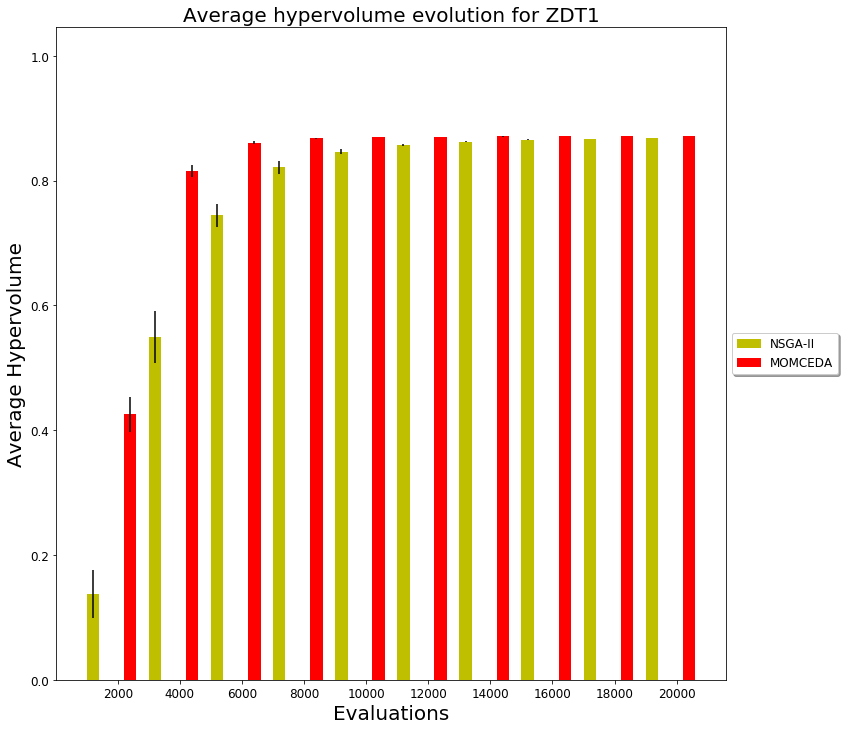

In [1]:
%matplotlib inline

%run ../dev/MOMCEDA/HVbar.py

function = 'ZDT1'
nReps = 10
NEval = 20000

showHVBar(function,nReps,NEval)

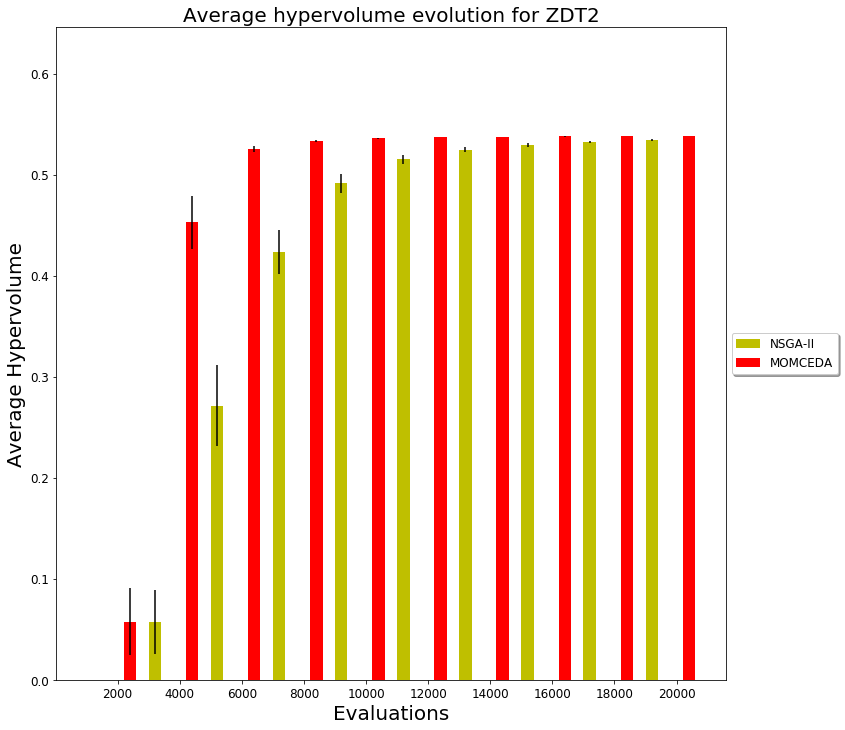

In [2]:
function = 'ZDT2'
showHVBar(function,nReps,NEval)

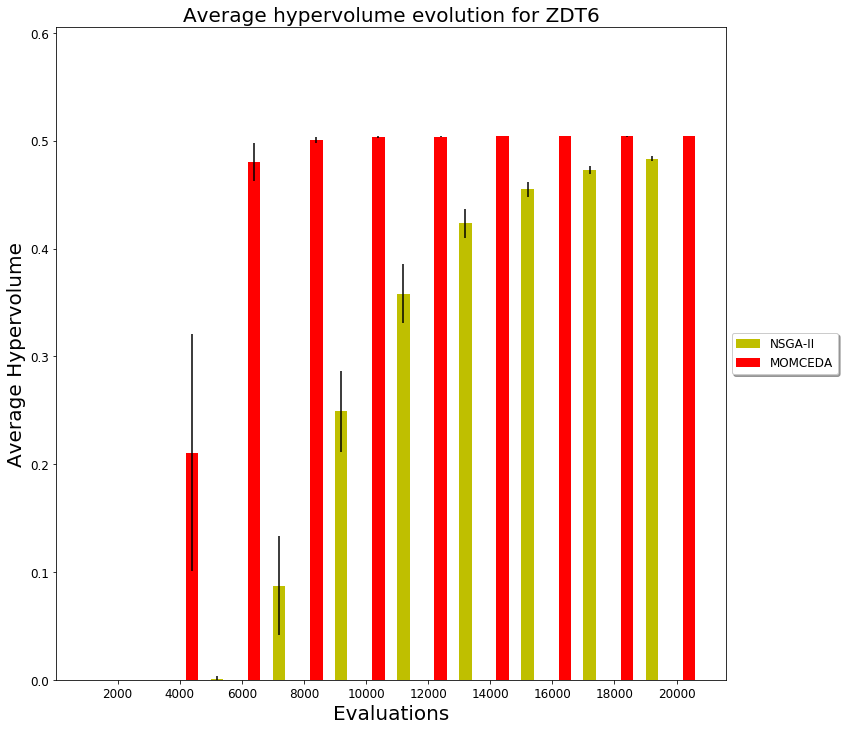

In [3]:
function = 'ZDT6'
showHVBar(function,nReps,NEval)

A seguir, apresentamos os valores finais das duas métricas avaliadas: hipervolume e convergência, para os dois algoritmos executados.

In [4]:
problems = [1,2,3,4,6]
for i in problems:
    print 'Final values for ZDT',i,' problem:'
    print 'Metric         Algorithm     Average    Std. deviation'
    
    with open(''.join(['../dev/files/HV_ZDT',str(i),'_MOMCEDA.pk1']),'r') as filename:
        hv1 = pickle.load(filename)
    meanHV1 = hv1[:,-1].mean(axis=0)
    stdHV1 = hv1[:,-1].std(axis=0)
    
    with open(''.join(['../dev/files/conv_ZDT',str(i),'_MOMCEDA.json']),'r') as filename:
        conv1 = np.asarray(json.load(filename))
    meanconv1 = conv1.mean(axis=0)
    stdconv1 = conv1.std(axis=0)
    
    with open(''.join(['../dev/files/HV_ZDT',str(i),'_NSGA2.json']),'r') as filename:
        hv2 = np.asarray(json.load(filename))
    meanHV2 = hv2[:,-1].mean(axis=0)
    stdHV2 = hv2[:,-1].std(axis=0)
    
    with open(''.join(['../dev/files/conv_ZDT',str(i),'_NSGA2.json']),'r') as filename:
        conv2 = np.asarray(json.load(filename))
    meanconv2 = conv2.mean(axis=0)
    stdconv2 = conv2.std(axis=0)
    
    print 'Hypervolume    MOMCEDA      %f    %.2E' %(meanHV1,stdHV1)
    print '               NSGA-II      %f    %.2E' %(meanHV2,stdHV2)
    print 'Convergence    MOMCEDA      %f    %.2E' %(meanconv1,stdconv1)
    print '               NSGA-II      %f    %.2E\n' %(meanconv2,stdconv2)

Final values for ZDT 1  problem:
Metric         Algorithm     Average    Std. deviation
Hypervolume    MOMCEDA      0.871316    7.84E-05
               NSGA-II      0.868347    4.91E-04
Convergence    MOMCEDA      0.000490    4.63E-05
               NSGA-II      0.002068    2.15E-04

Final values for ZDT 2  problem:
Metric         Algorithm     Average    Std. deviation
Hypervolume    MOMCEDA      0.538105    8.41E-05
               NSGA-II      0.534382    6.82E-04
Convergence    MOMCEDA      0.000472    4.38E-05
               NSGA-II      0.002178    4.05E-04

Final values for ZDT 3  problem:
Metric         Algorithm     Average    Std. deviation
Hypervolume    MOMCEDA      1.328007    2.96E-04
               NSGA-II      1.326033    5.26E-04
Convergence    MOMCEDA      0.001181    9.86E-05
               NSGA-II      0.001678    2.04E-04

Final values for ZDT 4  problem:
Metric         Algorithm     Average    Std. deviation
Hypervolume    MOMCEDA      0.853892    2.85E-02
        

As figuras mostram que o método proposto atinge valores maiores da métrica de hipervolume utilizando menos avaliações de funções do que o NSGA-II nos três problemas considerados. Os resultados finais para as métricas de hipervolume e convergência também mostram um desempenho superior para o método na maioria dos problemas, com exceção para o problema ZDT4. O MOMCEDA também apresentou maior robustez do que o NSGA-II, uma vez que os valores obtidos para desvio padrão são menores na maioria dos casos, o que mostra que os resultados do MOMCEDA são mais consistentes.

## Referências

Bilmes, J., 1997. A Gentle Tutorial of the EM Algorithm and its Application to Parameter Estimation for Gaussian Mixture and Hidden Markov Models, Berkeley, USA: ICSI, U.C..

Branke, J.; DEB, K.; Miettinen, K. & Slowinski, R., 2008. Multiobjective Optimization: Interactive and Evolutionary Approaches. Springer.

Coello Coello, C., Lamont, G. B. & Van Veldhuizen, D. A., 2007. Evolutionary Algorithms for Solving Multi-Objective Problems. s.l.:Springer.

Deb, K., Pratap, A., Agarwal, S. & Meyarivan, T., 2002. A fast and elitist multiobjective genetic algorithm: NSGA-II. IEEE Transactions on Evolutionary Computation, 6(2), pp. 182-197.

Deb, K. & Jain, H., 2013. An Evolutionary Many-Objective Optimization Algorithm Using Reference-point Based Non-dominated Sorting Approach, Part I: Solving Problems with Box Constraints. IEEE Transactions on Evolutionary Computation, 18(4), pp. 577-601.

Hauschild, M. & Pelikan, M., 2011. An introduction and survey of estimation of distribution algorithms. Swarm and Evolutionary Computation, Volume 1, pp. 111-128. Hwang, C. & Yoon, K., 1981. Multiple Attributes Decision Making Methods and Applications. Berlin: Springer-Verlag.

Hwang, C. & Yoon, K., 1981. Multiple Attributes Decision Making Methods and Applications. Berlin: Springer-Verlag.

Köksalan, M., Wallenius, J. & Zionts, S., 2011. Multiple Criteria Decision Making:
From Early History to the 21st Century. s.l.:World Scientific.

Zitzler, E.; Deb, K. & Thiele, L., 2000. Comparison of multiobjective evolutionary algorithms: Empirical results. Evolutionary Computation, v. 8, p. 173–195.

Zitzler, E. & Thiele, L., 1998. Multiobjective optimization using evolutionary algorithms — A comparative case study. Parallel Problem Solving from Nature - PPSN V, p. 292–301.